<a href="https://colab.research.google.com/github/harshini2506/Tataevcarodo/blob/main/Tataevcarodo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip '/content/TataEVCarOdoData-main.zip'

In [ ]:
%cd './TataEVCarOdoData-main/'

In [ ]:
import os
import xml.etree.ElementTree as ET
from PIL import Image

classes = ['0','1','2','3','4','5','6','7','8','9','others']

width_yolo=640
height_yolo=640
input_dir = '/content/TataEVCarOdoData-main/OCR'
output_dir = '/content/TataEVCarOdoData-main/OCR/YoloOCR'
os.path.exists(output_dir) or os.makedirs(output_dir)
#filename=r"C:\Users\bsaranga\Desktop\IIIT\Car\TataEVCarOdoData\Data\Apr-23\IMG_20230404_092612.xml"
for f_root, dirs, files in os.walk(input_dir):
    for filename in files:
        if filename.endswith('.xml'):
            f_path=os.path.join(f_root,filename)
            tree = ET.parse(f_path)
            xroot = tree.getroot()

            xroot.find('path').text = f_root+ "/" +xroot.find('filename').text
            #print(xroot.find('path').text)
            tree.write(f_path)
            image_path = xroot.find('path').text
            #print(f"Image file found: { image_path}")
            image_name = xroot.find('filename').text
            if os.path.exists(image_path):
                img = Image.open(image_path)
                 # Rest of your code
            else:
                 print(f"Image file not found: {image_path}")

            width_img, height_img = img.size
            w_scale=width_yolo/width_img
            h_scale=height_yolo/height_img
            objects = xroot.findall('object')
            for o in objects:
                bndbox = o.find('bndbox')

                print(o.find('name').text)
                print(classes)
                print(f"Image file found: {image_path}")
                left = int(int(bndbox.find('xmin').text)*w_scale)
                top = int(int(bndbox.find('ymin').text)*h_scale)
                right =int(int(bndbox.find('xmax').text)*w_scale)
                bottom = int(int(bndbox.find('ymax').text)*h_scale)
                class_id = classes.index(o.find('name').text)
                x_center = (int(left) + int(right)) / 2 / width_yolo
                y_center = (int(top) + int(bottom)) / 2 / height_yolo
                width = (int(right) - int(left)) / width_yolo
                height = (int(bottom) - int(top)) / height_yolo
                with open(os.path.join(output_dir, image_name.replace('jpg', 'txt')), 'a') as f:
                    f.write(' '.join([str(class_id), str(x_center), str(y_center), str(width), str(height) + '\n']))
            img.resize((width_yolo, height_yolo)).save(os.path.join(output_dir, image_name))
            print('Done:', image_name)
            #display(img)
            #print('Resized image_name')
            #display( image_name)
            #print('Resize image')
            #display(img.resize((width_yolo, height_yolo)))


Streaming output truncated to the last 5000 lines.
Image file found: /content/TataEVCarOdoData-main/OCR/Range/IMG_20220510_093641.jpg
Done: IMG_20220510_093641.jpg
2
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'others']
Image file found: /content/TataEVCarOdoData-main/OCR/Range/IMG20230914175727.jpg
2
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'others']
Image file found: /content/TataEVCarOdoData-main/OCR/Range/IMG20230914175727.jpg
7
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'others']
Image file found: /content/TataEVCarOdoData-main/OCR/Range/IMG20230914175727.jpg
Done: IMG20230914175727.jpg
2
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'others']
Image file found: /content/TataEVCarOdoData-main/OCR/Range/IMG20230906082344.jpg
3
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'others']
Image file found: /content/TataEVCarOdoData-main/OCR/Range/IMG20230906082344.jpg
0
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'others']
Image file found: /conten

In [ ]:
import os
from PIL import Image,ExifTags, ImageDraw
import xml.etree.ElementTree as ET
import random
import shutil
import glob
#Image along with yolo data in a folder, split the data into train,val and test
# define the classes
classes = ['0','1','2','3','4','5','6','7','8','9','others']

# define the input directory
input_dir = '/content/TataEVCarOdoData-main/OCR/YoloOCR'

# define the output directory
output_dir = '/content/TataEVCarOdoData-main/OCR/YoloOCR'

# define the train, val and test split
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

# define the image size
width = 640
height = 640

# define the output directories
train_img_dir = os.path.join(output_dir, 'train', 'images')
train_label_dir = os.path.join(output_dir, 'train', 'labels')

val_img_dir = os.path.join(output_dir, 'val', 'images')
val_label_dir = os.path.join(output_dir, 'val', 'labels')

test_img_dir = os.path.join(output_dir, 'test', 'images')
test_label_dir = os.path.join(output_dir, 'test', 'labels')


def move_img_labels(images, folder):
    for img_file in images:
        # get the image file name
        img_filename = os.path.basename(img_file)

        # get the XML file name
        xml_filename = img_filename.replace('.jpg', '.txt')
        shutil.move(os.path.join(input_dir, img_filename), os.path.join(output_dir,folder,"images", img_filename))
        shutil.move(os.path.join(input_dir, xml_filename), os.path.join(output_dir,folder,"labels", xml_filename))

# create the directories
os.path.exists(train_img_dir) or os.makedirs(train_img_dir)
os.path.exists(train_label_dir) or os.makedirs(train_label_dir)

os.path.exists(val_img_dir) or os.makedirs(val_img_dir)
os.path.exists(val_label_dir) or os.makedirs(val_label_dir)

os.path.exists(test_img_dir) or os.makedirs(test_img_dir)
os.path.exists(test_label_dir) or os.makedirs(test_label_dir)

# get the list of all the images
img_files = glob.glob(os.path.join(input_dir, '*.jpg'))

# shuffle the images
random.Random(42).shuffle(img_files)

# split the images into train, val and test
train_files = img_files[:int(train_ratio * len(img_files))]
val_files = img_files[int(train_ratio * len(img_files)):int((train_ratio + val_ratio) * len(img_files))]
test_files = img_files[int((train_ratio + val_ratio) * len(img_files)):]
print('Total number of images:', len(img_files))
print('Training:', len(train_files))
print('Validation:', len(val_files))
print('Testing:', len(test_files))

move_img_labels(train_files,"train")

move_img_labels(val_files,"val")

move_img_labels(test_files,"test")

Total number of images: 240
Training: 192
Validation: 24
Testing: 24


In [ ]:
!pip install ultralytics==8.0.186 wandb

In [ ]:
!wget 'https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8n.pt'

In [ ]:
!wandb login
#1dc9adefc193a272e3bead8746ce87083bf43338
#c14443679fb304bd400903a66c13635b5c38cd69

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
!touch '/content/TataEVCarOdoData-main/data.yaml'

In [ ]:
from ultralytics import YOLO
from wandb.integration.ultralytics import add_wandb_callback

# Load a pretrained YOLO model (recommended for training)
model = YOLO('yolov8n.pt')

# Add the Weights & Biases callback to the model.
# This will work for training, evaluation and prediction
add_wandb_callback(model, enable_model_checkpointing=True)


# Train the model using the 'coco128.yaml' dataset for 3 epochs
results = model.train(project="data1",data='/content/TataEVCarOdoData-main/data.yaml', epochs=100)

# # Evaluate the model's performance on the validation set
results = model.val()

# # Perform object detection on an image using the model
results = model('/content/TataEVCarOdoData-main/OCR/YoloOCR/test/images/IMG20230610211301.jpg')

# # Export the model to ONNX format
# success = model.export(format='onnx')

WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

New https://pypi.org/project/ultralytics/8.0.228 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.186 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/TataEVCarOdoData-main/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=data1, name=None, exist_ok=False, pretrained=True, optimi

Streaming output truncated to the last 5000 lines.
image 1/1 /content/TataEVCarOdoData-main/OCR/YoloOCR/val/images/IMG_20221015_115000.jpg: 640x640 2 0s, 3 1s, 3 4s, 1 6, 2 9s, 8.6ms
Speed: 1.7ms preprocess, 8.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train

image 1/1 /content/TataEVCarOdoData-main/OCR/YoloOCR/val/images/IMG_20220905_092430.jpg: 640x640 3 0s, 1 1, 4 4s, 1 5, 1 7, 8.2ms
Speed: 1.7ms preprocess, 8.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train

image 1/1 /content/TataEVCarOdoData-main/OCR/YoloOCR/val/images/IMG_20220629_110541.jpg: 640x640 1 1, 3 2s, 1 3, 1 4, 1 7, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train

image 1/1 /content/TataEVCarOdoData-main/OCR/YoloOCR/val/images/IMG_20220616_134004.jpg: 640x640 2 0s, 3 1s, 1 2, 1 3, 1 4, 2 8s, 2 9s, 9.0ms
Speed: 1.8ms preproc

  0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
model = YOLO('/content/TataEVCarOdoData-main/data1/train/weights/best.pt')

results = model('/content/TataEVCarOdoData-main/OCR/YoloOCR/test/images/IMG20230610211301.jpg')


image 1/1 /content/TataEVCarOdoData-main/OCR/YoloOCR/test/images/IMG20230610211301.jpg: 640x640 2 1s, 1 2, 2 5s, 12.6ms
Speed: 1.7ms preprocess, 12.6ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)


In [12]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
#https://stackoverflow.com/questions/56081324/why-are-google-colab-shell-commands-not-working

In [13]:
!pip install supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 2.5 MB/s eta 0:00:00



0: 640x640 1 0, 6 1s, 3 2s, 1 3, 1 6, 14.3ms
Speed: 2.5ms preprocess, 14.3ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)


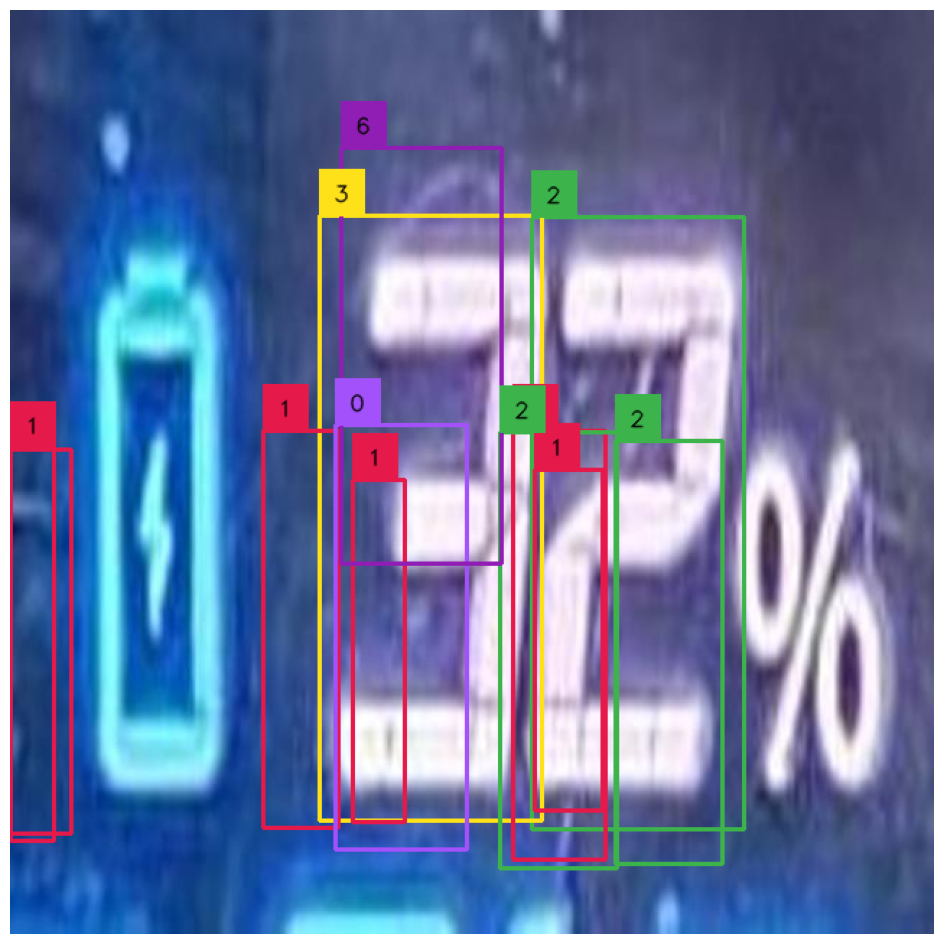

In [14]:
import cv2
from ultralytics import YOLO
import supervision as sv

model = YOLO("/content/TataEVCarOdoData-main/data1/train/weights/best.pt")
image = cv2.imread("/content/TataEVCarOdoData-main/OCR/YoloOCR/test/images/IMG20230628093803.jpg")
results = model(image)[0]
detections = sv.Detections.from_ultralytics(results)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

labels = [
    results.names[class_id]
    for class_id
    in detections.class_id
]

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections, labels=labels)

sv.plot_image(annotated_image)

In [15]:
success = model.export(format='onnx')

Ultralytics YOLOv8.0.186 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from '/content/TataEVCarOdoData-main/data1/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 15, 8400) (6.0 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 78.2 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 8.0s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: export success ✅ 9.5s, saved as '/content/TataEVCarOdoData-main/data1/train/weights/best.onnx' (11.7 MB)

Export complete (11.5s)
Results saved to /content/TataEVCarOdoData-main/data1/train/weights
Predict:         yolo predict task=detect model=/content/TataEVCarOdoData-main/data1/train/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect mod

In [ ]:
import shutil

folder_path = '/content/TataEVCarOdoData-main/TataEVCarOdoData-main'
if os.path.exists(folder_path):
    shutil.rmtree(folder_path)
    print(f"{folder_path} and its contents have been deleted.")
else:
    print(f"{folder_path} does not exist.")

/content/TataEVCarOdoData-main/TataEVCarOdoData-main and its contents have been deleted.
